## Classifiers Models: With Interactions
### Multiclass Classifiers - 3 classes

Calling the dataset with interactions

In [1]:
from data_processing import *

csv = 'features.csv'
d = data_clean(csv)

df_mm, num_scale = d.read_scale(csv)
X_train, X_test, y_train, y_test = d.split(csv)
X_train, X_test, y_train, y_test = d.index(csv)

X = num_scale
y = df_mm['cat']

df_mm.groupby('cat').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,residual sugar_chlorides,residual sugar_total sulfur dioxide,chlorides_density,chlorides_sulphates,free sulfur dioxide_sulphates,total sulfur dioxide_sulphates,density_pH,volatile acidity_alcohol,quality,type
cat,,,,,,,,,,,,,,,,,,,,,
0,246,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,246,246,246,246,246
1,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974,...,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974
2,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,...,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277


### Balancing the classes

In [26]:
col = list(num_scale.columns)

from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
import numpy as np

smt = SMOTE(sampling_strategy='not majority', k_neighbors=3)
X_train_s, y_train_s = smt.fit_sample(np.asarray(X_train), np.asarray(y_train))

X_test_s, y_test_s = smt.fit_sample(np.asarray(X_test), np.asarray(y_test))

X_test_smote = pd.DataFrame(X_test_s, columns=col)
y_test_smote = pd.DataFrame(y_test_s, columns=['cat'])

X_train_smote = pd.DataFrame(X_train_s, columns=col)
y_train_smote = pd.DataFrame(y_train_s, columns=['cat'])

smote_df = X_train_smote.join(y_train_smote)

smote_df.groupby('cat').count()

### Base Models

In [49]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score


LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train_smote, y_train_smote)
y_logi = LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

# one to all SVM 
SVM = svm.SVC(decision_function_shape="ovr").fit(X_train_smote, y_train_smote)
y_sv = SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)


# one to one SVM

SVM = svm.SVC(decision_function_shape="ovo").fit(X_train_smote, y_train_smote)
y_svo = SVM.predict(X_test)
round(SVM.score(X_test, y_test), 4)


# Random Forest

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train_smote, y_train_smote)
y_rf = RF.predict(X_test)
round(RF.score(X_test_smote, y_test_smote), 4)


NN = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh', hidden_layer_sizes=(150, 10), random_state=1).fit(X_train_smote, y_train_smote)
y_pred = NN.predict(X_test)
round(NN.score(X_test_smote, y_test_smote), 4)



### Metrics Valuation

from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

print('Accuracy:', round(accuracy_score(y_test, y_rf), 3))
print('Precision:', round(metrics.precision_score(y_test, y_rf, average='weighted'),3))
print('Recall:', round(recall_score(y_test,y_rf, average='weighted'),3))
print(classification_report(y_test, y_rf))

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test_smote, y_pred)
cnf_matrix



import matplotlib.pyplot as plt
import seaborn as sns

class_names=['bad','average','good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Classifiers Without Interactions

In [6]:
from data_processing import *

csv = 'data.csv'
d = data_clean(csv)

df_mm, num_scale = d.read_scale(csv)
X_train, X_test, y_train, y_test = d.split(csv)
X_train, X_test, y_train, y_test = d.index(csv)

X = num_scale
y = df_mm['cat']

df_mm.groupby('cat').count().iloc[:,-1]

cat
0     246
1    4974
2    1277
Name: type, dtype: int64

### Balancing the classes: SMOTE

In [9]:
col = list(num_scale.columns)

from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
import numpy as np

smt = SMOTE(sampling_strategy='not majority', k_neighbors=3)
X_train_s, y_train_s = smt.fit_sample(np.asarray(X_train), np.asarray(y_train))

X_test_s, y_test_s = smt.fit_sample(np.asarray(X_test), np.asarray(y_test))

X_test_smote = pd.DataFrame(X_test_s, columns=col)
y_test_smote = pd.DataFrame(y_test_s, columns=['cat'])

X_train_smote = pd.DataFrame(X_train_s, columns=col)
y_train_smote = pd.DataFrame(y_train_s, columns=['cat'])

smote_df = X_train_smote.join(y_train_smote)

smote_df.groupby('cat').count().iloc[:,0]

cat
0    3982
1    3982
2    3982
Name: fixed acidity, dtype: int64

### Modelling

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score

In [12]:
# Logistic Regression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train_smote, y_train_smote)
y_logi = LR.predict(X_test)
print('Logistic Regression Score:',round(LR.score(X_test,y_test), 4))

Logistic Regression Score: 0.5277


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# one to all SVM 
SVM = svm.SVC(decision_function_shape="ovr").fit(X_train_smote, y_train_smote)
y_sv = SVM.predict(X_test)
print('SVM one to many Score:',round(SVM.score(X_test, y_test), 4))

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM one to many Score: 0.6415


In [14]:
# one to one SVM

SVM = svm.SVC(decision_function_shape="ovo").fit(X_train_smote, y_train_smote)
y_svo = SVM.predict(X_test)
print('SVM one to one Score:',round(SVM.score(X_test, y_test), 4))


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM one to one Score: 0.6415


In [15]:
# Random Forest

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train_smote, y_train_smote)
y_rf = RF.predict(X_test)
print('Random Forest Score:',round(RF.score(X_test_smote, y_test_smote), 4))


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Score: 0.7154


In [ ]:
# Neural Networks

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, activation='tanh', hidden_layer_sizes=(150, 10), random_state=1).fit(X_train_smote, y_train_smote)
y_pred = NN.predict(X_test)
print('NN Score:',round(NN.score(X_test_smote, y_test_smote), 4))

Accuracy: 0.777
Precision: 0.822
Recall: 0.777
              precision    recall  f1-score   support

           0       0.31      0.47      0.38        55
           1       0.92      0.78      0.84       992
           2       0.56      0.82      0.67       253

    accuracy                           0.78      1300
   macro avg       0.60      0.69      0.63      1300
weighted avg       0.82      0.78      0.79      1300



Text(0.5, 257.44, 'Predicted label')

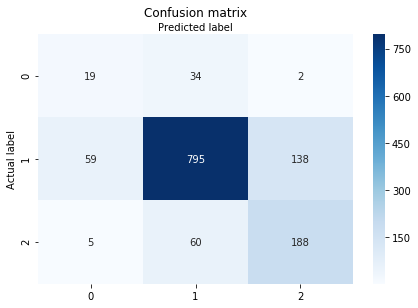

In [17]:
### Metrics Valuation

from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

print('Accuracy:', round(accuracy_score(y_test, y_rf), 3))
print('Precision:', round(metrics.precision_score(y_test, y_rf, average='weighted'),3))
print('Recall:', round(recall_score(y_test,y_rf, average='weighted'),3))
print(classification_report(y_test, y_rf))

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


import matplotlib.pyplot as plt
import seaborn as sns

class_names=['bad','average','good'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues' ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')